In [28]:
import numpy as np
import pandas as pd
from additional import DatasetGenerator
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.optimizers import Adam
from keras.metrics import RootMeanSquaredError

from sklearn.metrics import mean_squared_error, mean_absolute_error


import warnings
warnings.filterwarnings('ignore')

In [29]:
RELIANCE = pd.read_csv("D:/time-series-stock-pred/equities/RELIANCE.csv")

In [30]:
RELIANCE.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,14.638248,14.716795,14.541850,14.691803,9.302443,52060684
1,1996-01-02,14.656100,14.727506,14.470444,14.577553,9.230103,84371654
2,1996-01-03,14.816763,15.491551,14.656100,14.688232,9.300183,104661939
3,1996-01-04,14.548991,14.595404,14.356194,14.552561,9.214279,108450132
4,1996-01-05,14.495436,14.495436,14.327632,14.452592,9.150980,83354233


In [31]:
RELIANCE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7079 entries, 0 to 7078
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       7079 non-null   object 
 1   Open       7079 non-null   float64
 2   High       7079 non-null   float64
 3   Low        7079 non-null   float64
 4   Close      7079 non-null   float64
 5   Adj Close  7079 non-null   float64
 6   Volume     7079 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 387.3+ KB


In [32]:
RELIANCE["Date"] = pd.to_datetime(RELIANCE["Date"])

In [33]:
ed_date = '2023-06-01'
RELIANCE_Train_X, RELIANCE_Train_Y, RELIANCE_Test_X, RELIANCE_Test_Y = DatasetGenerator.Dataset(RELIANCE, ed_date)

In [34]:
def LSTM_model():
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.LSTM(200, input_shape = (5, 1), activation = tf.nn.leaky_relu, return_sequences = True),
                                      tf.keras.layers.LSTM(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(100, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(50, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(5, activation = tf.nn.leaky_relu)
                                      ])
  return model

In [35]:
lstm = LSTM_model()
lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 5, 200)            161600    
                                                                 
 lstm_3 (LSTM)               (None, 200)               320800    
                                                                 
 dense_4 (Dense)             (None, 200)               40200     
                                                                 
 dense_5 (Dense)             (None, 100)               20100     
                                                                 
 dense_6 (Dense)             (None, 50)                5050      
                                                                 
 dense_7 (Dense)             (None, 5)                 255       
                                                                 
Total params: 548,005
Trainable params: 548,005
Non-tr

In [36]:
lstm.compile(optimizer=Adam(learning_rate=3e-4), loss = 'mse', metrics=[RootMeanSquaredError()])

In [37]:
history = lstm.fit(RELIANCE_Train_X,RELIANCE_Train_Y, epochs= 1000,validation_data = (RELIANCE_Test_X, RELIANCE_Test_Y))

Epoch 1/1000
44/44 [==============================] - 2s 26ms/step - loss: 418507.3438 - root_mean_squared_error: 646.9214 - val_loss: 379459.0000 - val_root_mean_squared_error: 616.0024
Epoch 2/1000
44/44 [==============================] - 1s 19ms/step - loss: 5200.8638 - root_mean_squared_error: 72.1170 - val_loss: 11021.1338 - val_root_mean_squared_error: 104.9816
Epoch 3/1000
44/44 [==============================] - 1s 18ms/step - loss: 1285.1619 - root_mean_squared_error: 35.8492 - val_loss: 4158.4956 - val_root_mean_squared_error: 64.4864
Epoch 4/1000
44/44 [==============================] - 1s 17ms/step - loss: 1164.8734 - root_mean_squared_error: 34.1302 - val_loss: 6376.6636 - val_root_mean_squared_error: 79.8540
Epoch 5/1000
44/44 [==============================] - 1s 17ms/step - loss: 1247.3015 - root_mean_squared_error: 35.3172 - val_loss: 4784.5693 - val_root_mean_squared_error: 69.1706
Epoch 6/1000
44/44 [==============================] - 1s 17ms/step - loss: 1175.4059 - 

In [40]:
history_dict = history.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

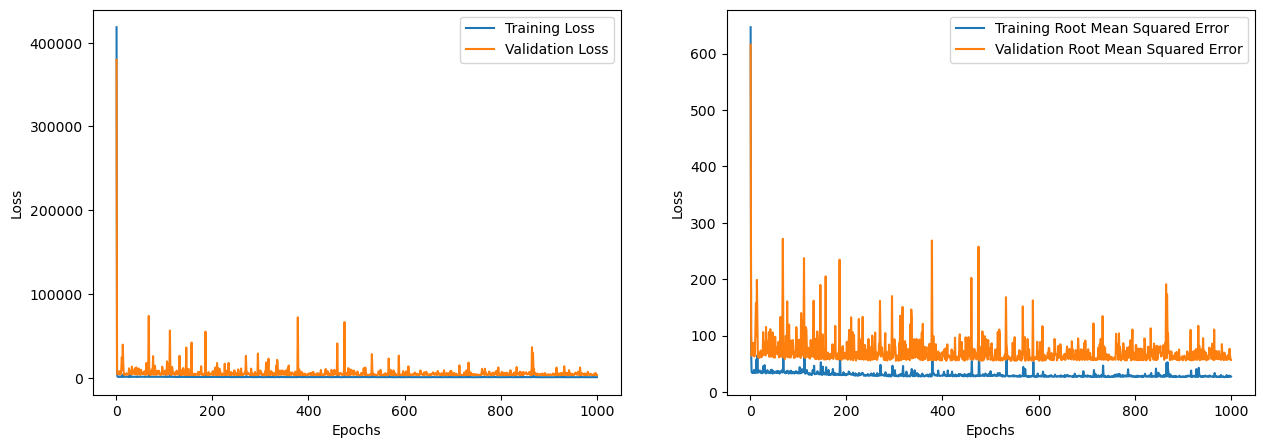

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

In [42]:
prediction = lstm.predict(RELIANCE_Test_X)

2/2 [==============================] - 0s 6ms/step


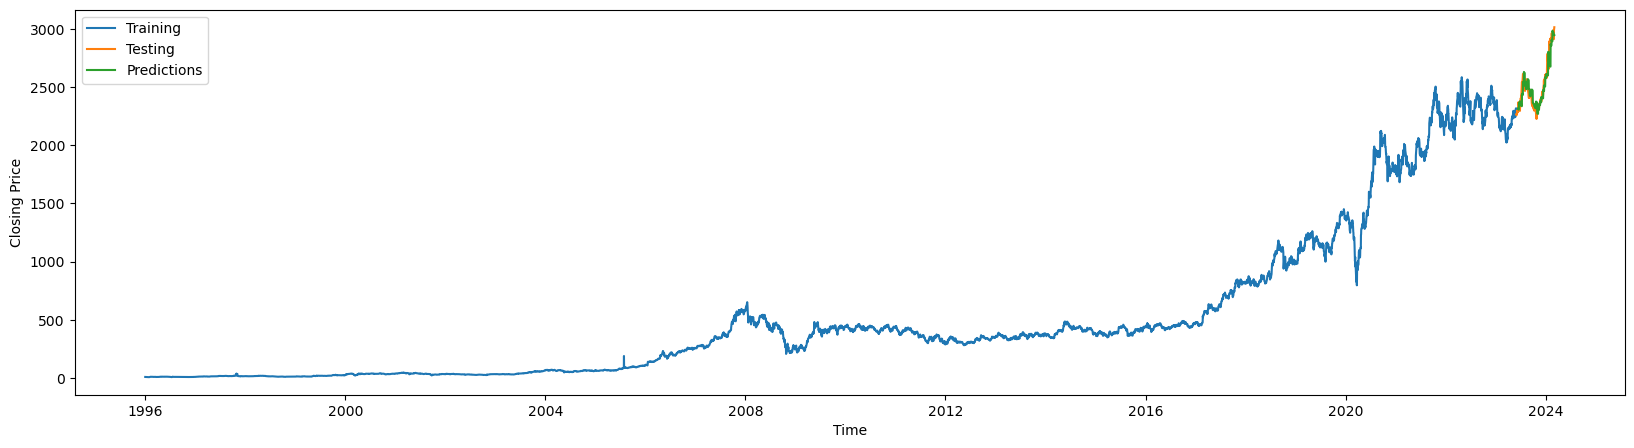

In [64]:
plt.figure(figsize=(20,5))
plt.plot(RELIANCE['Date'][RELIANCE['Date'] < '2023-06-01'], RELIANCE['Adj Close'][RELIANCE['Date'] < '2023-06-01'], label = 'Training')
plt.plot(RELIANCE['Date'][RELIANCE['Date'] >= '2023-06-01'], RELIANCE['Adj Close'][RELIANCE['Date'] >= '2023-06-01'], label = 'Testing')
plt.plot(RELIANCE['Date'][RELIANCE['Date'] >= '2023-06-13'], prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')